<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Six_Human_Emotions_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
train_data=pd.read_csv("/content/train.txt",header=None,sep=';',names=['Comment','Emotion'],encoding='utf-8')

In [3]:
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
train_data.shape

(16000, 2)

In [5]:
train_data['length']=[len(x) for x in train_data['Comment']]

In [6]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [7]:
train_data.isnull().sum()

,0
Comment,0
Emotion,0
length,0


In [8]:
train_data.duplicated().sum()

1

In [9]:
train_data.drop_duplicates(inplace=True)

In [10]:
train_data["Emotion"].value_counts()

,count
Emotion,
joy,5361
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


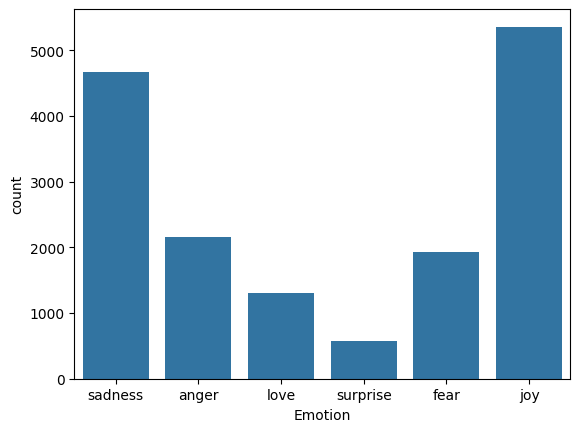

In [11]:
sns.countplot(x=train_data['Emotion'])
plt.show()

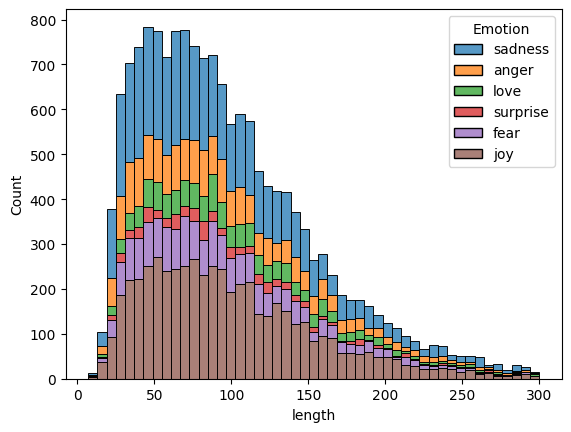

In [12]:
#data distribution
df2=train_data.copy()
length_values=df2['length'].values
sns.histplot(data=df2,x='length',hue='Emotion',multiple='stack')
plt.show()

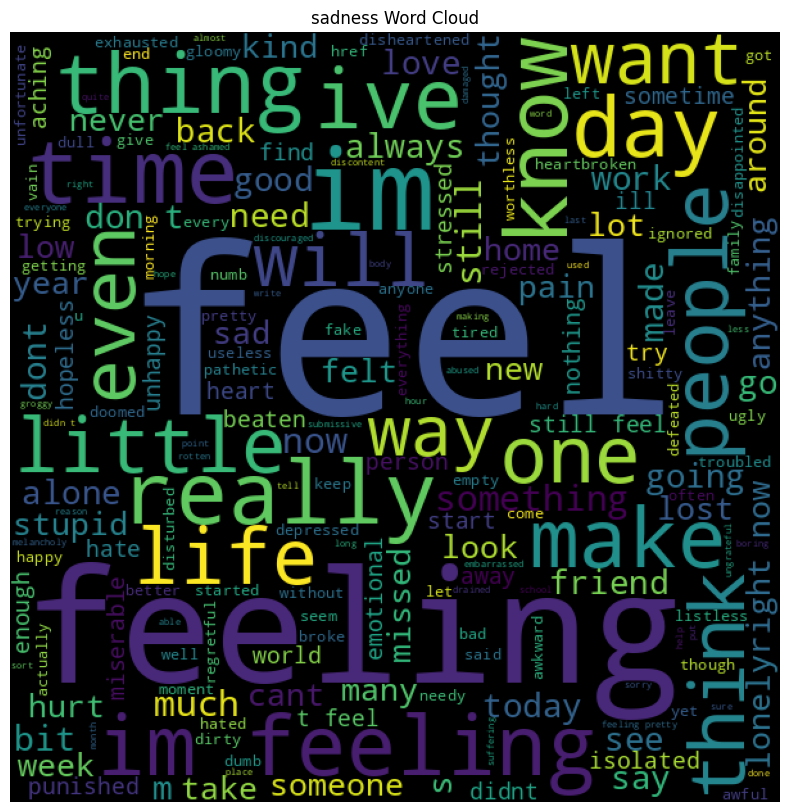

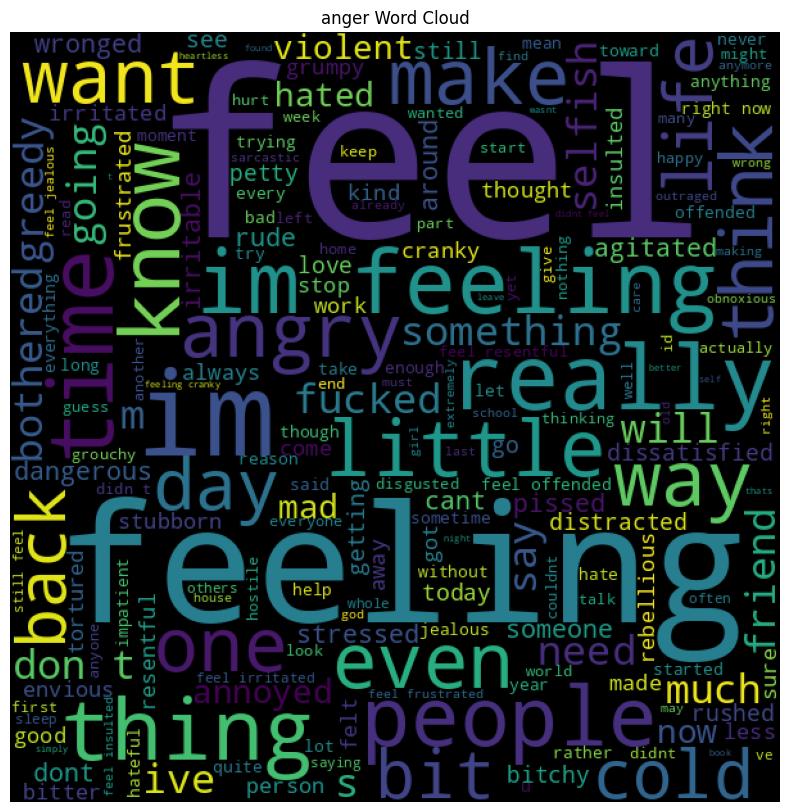

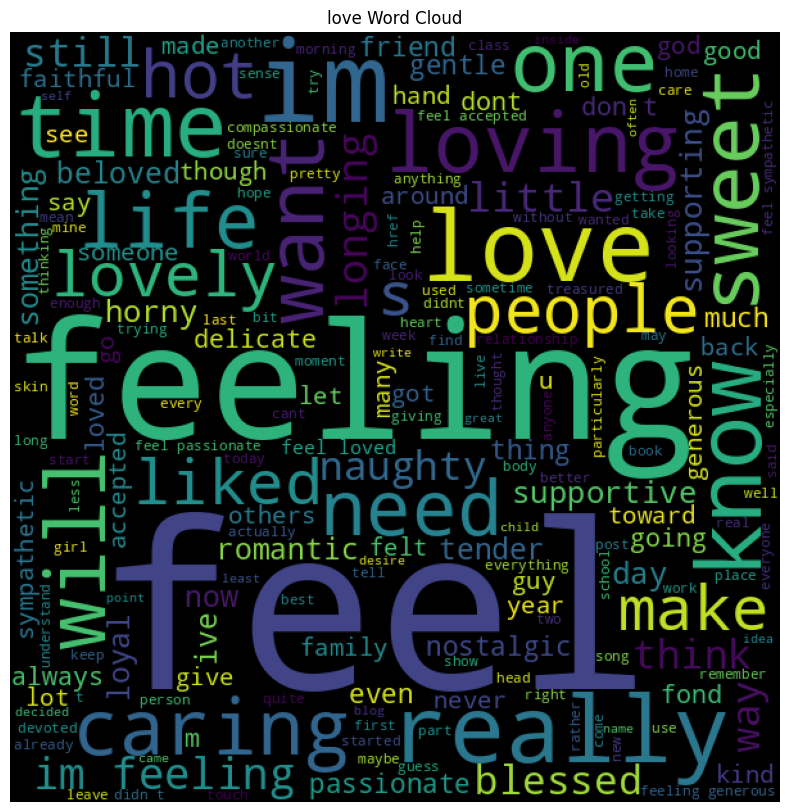

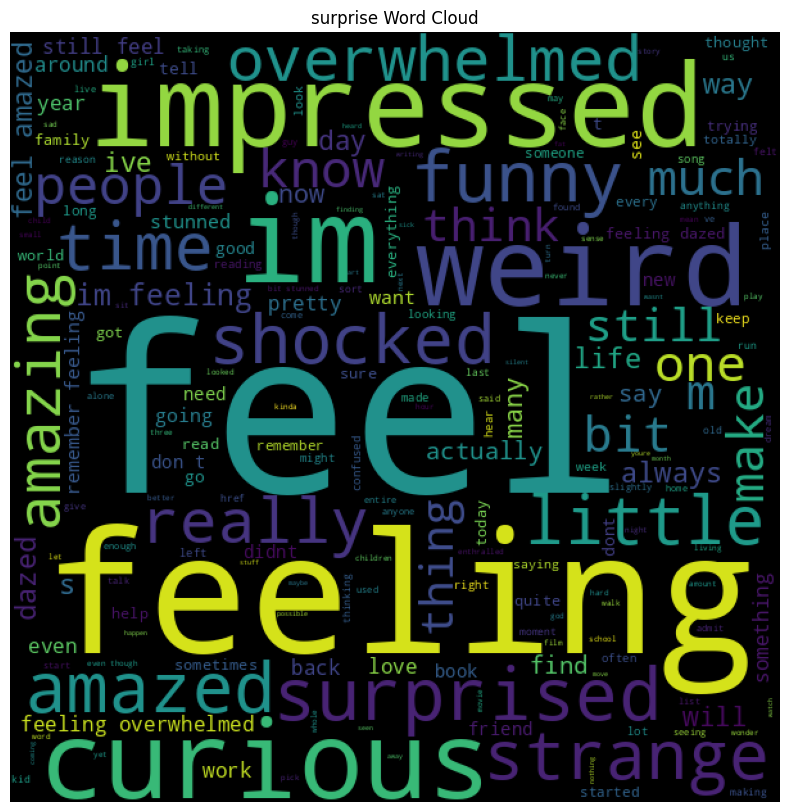

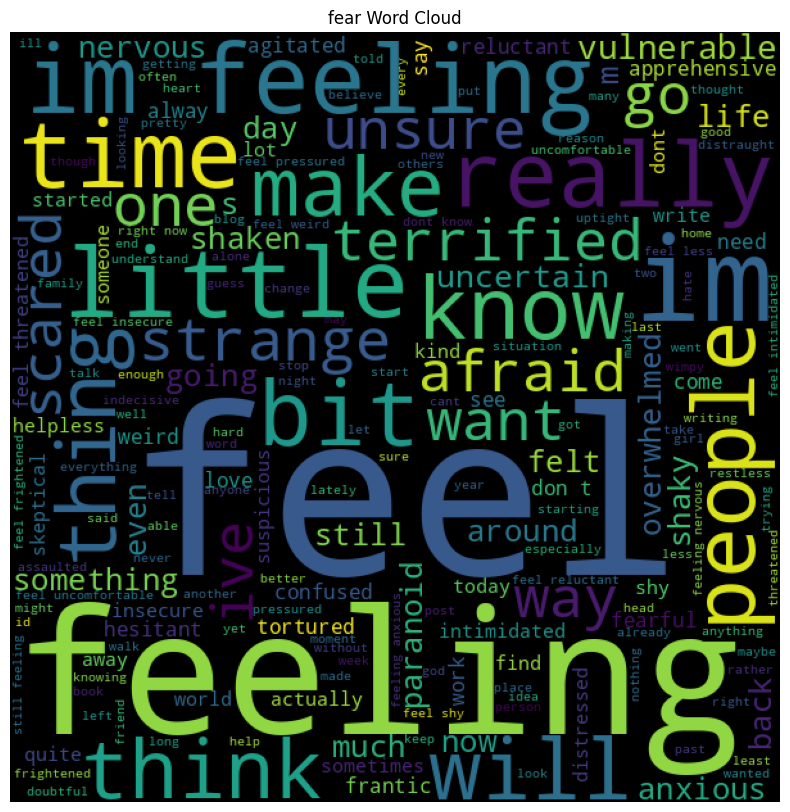

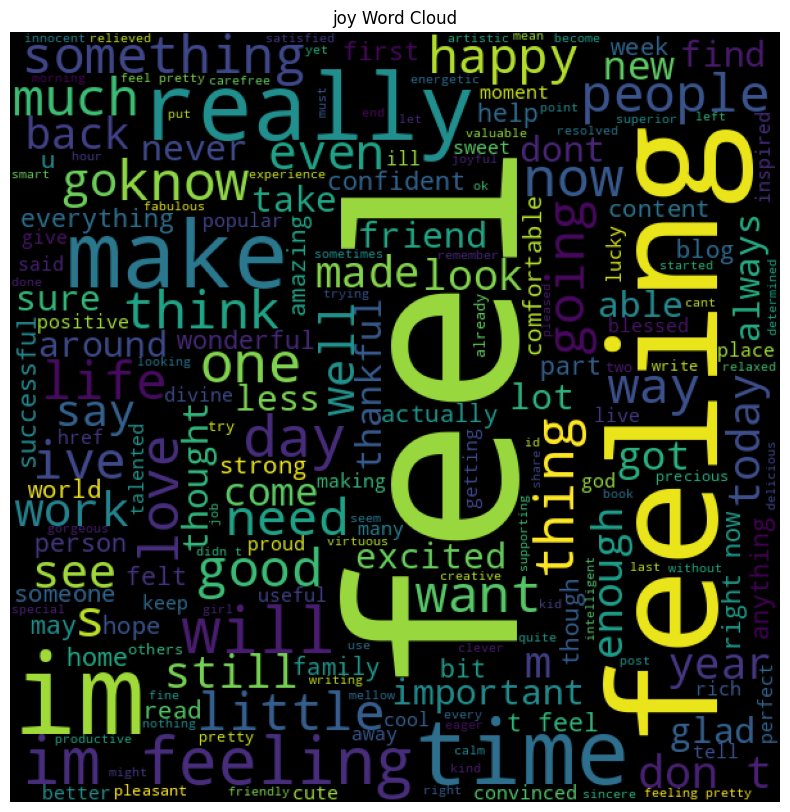

In [13]:
def words_cloud(wordcloud,emotion):
  plt.figure(figsize=(10,10))
  plt.title(emotion+" Word Cloud")
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


emotions_list=train_data['Emotion'].unique()
for emotion in emotions_list:
  text=" ".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
  wordcloud=WordCloud(width=600,height=600).generate(text)
  words_cloud(wordcloud,emotion)

In [14]:
#Data PreProcessing
lb=LabelEncoder()
train_data['Emotion_Encoded']=lb.fit_transform(train_data['Emotion'])

In [15]:
train_data

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [16]:
#Applying Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [17]:
df=train_data.copy()

In [18]:
df

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [19]:
#Data Cleaning and download nltk stopwords
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
len(stopwords)

179

In [22]:
len(set(stopwords))

179

In [23]:
stopwords=set(stopwords)

In [24]:
def clean_text(text):
  stemmer = PorterStemmer()
  text=re.sub("[^a-zA-Z]",' ',text)
  text=text.lower()
  text=text.split()
  text=[stemmer.stem(word) for word in text if not word in set(stopwords)]
  return " ".join(text)

In [25]:
df['Cleaned_Comment']=df['Comment'].apply(clean_text)

In [26]:
df

,Comment,Emotion,length,Emotion_Encoded,Cleaned_Comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(df['Cleaned_Comment'],df['Emotion_Encoded'],test_size=0.2,random_state=42)

In [28]:
tfidf_vectorizer=TfidfVectorizer()

In [29]:
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [30]:
classifier={
    'Multinomial Naive Bayes':MultinomialNB(),
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine':SVC()
}

In [31]:
for name,clf in classifier.items():
  print(f"\n============={name}=============")
  clf.fit(X_train_tfidf,Y_train)
  Y_pred=clf.predict(X_test_tfidf)
  accuracy_tfidf=accuracy_score(Y_test,Y_pred)
  print(f"\nAccuracy using TF-IDF:{accuracy_tfidf}")
  print("Classification Report:")
  print(classification_report(Y_test,Y_pred))


=============Multinomial Naive Bayes=============

Accuracy using TF-IDF:0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


=============Logistic Regression=============


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy using TF-IDF:0.8240625
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.83      0.46      0.59       303
           4       0.88      0.92      0.90       950
           5       0.74      0.46      0.57       106

    accuracy                           0.82      3200
   macro avg       0.82      0.71      0.75      3200
weighted avg       0.83      0.82      0.82      3200


=============Random Forest=============

Accuracy using TF-IDF:0.845625
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       439
           1       0.83      0.85      0.84       375
           2       0.84      0.89      0.86      1027
           3       0.79      0.61      0.69       303
           4       0.91      0.88 

In [32]:
lg=LogisticRegression()
lg.fit(X_train_tfidf,Y_train)
Y_pred_lg=lg.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
def pred_emotion(input_text):
    # Clean the input text and ensure it is in a list form
    cleaned_text = clean_text(input_text)  # Should return a list like ['cleaned text']

    # Transform the cleaned text using the TF-IDF vectorizer
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict the label using the logistic regression model
    predicted_label = lg.predict(input_vectorized)[0]  # Get the first (and only) prediction

    # Inverse transform the label to get the emotion name
    emotion = lb.inverse_transform([predicted_label])[0]

    # Return the predicted emotion and label
    return emotion, predicted_label


In [34]:
sentences = ["I didn't feel humiliated"]
for sentence in sentences:
    emotion, label = pred_emotion(sentence)
    print(f"Predicted Emotion: {emotion}")
    print(f"Predicted Label: {label}")

Predicted Emotion: sadness
Predicted Label: 4


In [35]:
import pickle
pickle.dump(lg,open('model.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(lb,open('label_encoder.pkl','wb'))

In [36]:
import sklearn
print(sklearn.__version__)

1.3.2


Applying Deep Learning Using LSTM

In [37]:
train_data

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [38]:
max([len(w) for w in train_data['Comment']])
stopwords=set(nltk.corpus.stopwords.words('english'))

In [39]:
def clean_text_dl(df,column,vocab_size,max_len):
  stemmer=PorterStemmer()

  corpus=[]
  for text in df[column]:
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(w) for w in text if w not in stopwords]
    text=" ".join(text)
    corpus.append(text)
  one_hot_word=[one_hot(input_text=word,n=vocab_size) for word in corpus]
  padded_word=pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
  return padded_word
x_train=clean_text_dl(train_data,'Comment',vocab_size=11000,max_len=300)
y_train=train_data['Emotion_Encoded']

In [40]:
lb=LabelEncoder()
train_data['Emotion']=lb.fit_transform(train_data['Emotion'])

In [41]:
y_train=to_categorical(train_data['Emotion'])

In [42]:
x_train.shape

(15999, 300)

In [44]:
model=Sequential()
model.add(Embedding(input_dim=11000,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.4219 - loss: 1.4444
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8519 - loss: 0.4759
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9208 - loss: 0.2466
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9406 - loss: 0.1771
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9551 - loss: 0.1287
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9641 - loss: 0.1013
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9725 - loss: 0.0758
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9766 - loss: 0.0704
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9783 - loss: 0.0605
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9812 - loss: 0.0540


Predictive System

In [49]:
def pred(text):
  stemmer=PorterStemmer()
  corpus=[]
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text=[stemmer.stem(w) for w in text if w not in stopwords]
  text=" ".join(text)
  corpus.append(text)
  one_hot_word=[one_hot(input_text=word,n=11000) for word in corpus]
  padded_word=pad_sequences(sequences=one_hot_word,maxlen=300,padding='pre')
  return padded_word

sentences=[
    'I hates mangoes',
    'I feel strong and good overall',
    'he is really sweet and caring'
]

for sent in sentences:
  cleaned_sent=pred(sent)
  emotion=lb.inverse_transform(np.argmax(model.predict(cleaned_sent),axis=-1))[0]
  label=np.max(model.predict(cleaned_sent))
  print(sent)
  print(emotion)
  print(label)
  print("=========================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
I hates mangoes
anger
0.927615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I feel strong and good overall
joy
0.9997497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
he is really sweet and caring
love
0.927251


In [50]:
model.save('model.h5')